[[1.         0.76193786 0.84257495 ... 0.78001948 0.94147252 0.40274283]
 [0.76193786 1.         0.70082576 ... 0.87570468 0.83082911 0.61766632]
 [0.84257495 0.70082576 1.         ... 0.8081532  0.82411482 0.53674233]
 ...
 [0.78001948 0.87570468 0.8081532  ... 1.         0.80359305 0.80484014]
 [0.94147252 0.83082911 0.82411482 ... 0.80359305 1.         0.47582963]
 [0.40274283 0.61766632 0.53674233 ... 0.80484014 0.47582963 1.        ]]


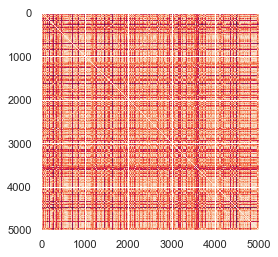

In [2]:
import seaborn as sns; sns.set()
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt


f = open('FeatureMatrix.txt', 'r')
DataMatrix = [[float(num) for num in line.split(',')] for line in f]
DataFrame=np.asarray(DataMatrix)
corr = np.corrcoef(DataFrame)
print(corr)

# Plot of correlation matrices from raw data
imshow(np.asarray(corr))




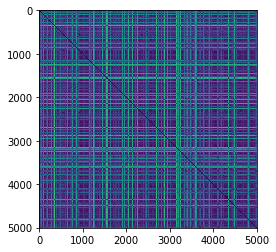

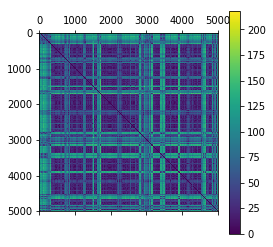

26
1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
2
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
3
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
4
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
5
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
6
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
7
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
8
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
9
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
10
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
11
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
12
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
13
13
14
15
16
17
18
19
20
21
22
23
24
25
26
14
14
15
16
17
18
19
20
21
22
23
24
25
26
15
15
16
17
18
19
20
21
22
23
24
25
26
16
16
17
18
19
20
21
22
23
24
25
26
17
17
18
19
20
21
22
23
24
25
26
18
18
19
20
21
22
23
24
25
26
19
19
20
21
22
23
24
25
26
20
20
21
22
23
24
25
26
2

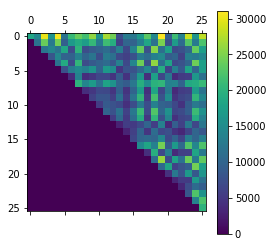

In [14]:
import numpy as np
from numpy import linalg as LA
from sklearn import metrics
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

# import Partition from clustering methods and convert in vector of integers
g = open('PartitionSC.txt', 'r')
Partition=[int(line)  for line in g]
Partition=np.int_(Partition)
# import distance or similarity matrices and convert in array
f = open('dist_matrix.txt', 'r')

DistMatrix = [[float(num) for num in line.split(',')] for line in f]
DistMatrix=np.asarray(DistMatrix)
DistMatrix=DistMatrix+np.transpose(DistMatrix)

# Plot Distance or similarity Matrix 
imshow(np.asarray(DistMatrix))

# Define the vector which reorder data point per cluster assignment
PartitionSC=[0];
nbpercluster=np.zeros((max(Partition)+1,1))
nbpercluster2=np.zeros((max(Partition)+1,1))
cpt=0
for i in range(1,max(Partition)+1):
    for j in range(0,len(Partition)):
        if Partition[j]==i:
            PartitionSC.append(int(j))
            nbpercluster[i]=nbpercluster[i]+1
    nbpercluster2[i]=nbpercluster2[i-1]+nbpercluster[i]

nbpercluster=np.int_(nbpercluster2)    

# Reorder the distance/similarity Matrix per cluster               
DistMatrixOrd=DistMatrix[PartitionSC,:]
DistMatrixOrd=DistMatrixOrd[:,PartitionSC]
# plot of the reordered distance/similarity matrix
plt.matshow(DistMatrixOrd)
plt.colorbar()
plt.show()               
           



# Clustering Criterion : evaluate the mean ratio between the off diagonal blocks which represent 
# the distance/similarity between the clusters and the diagonal ones which represent the 
# distance/similarity within the clusters
BlocClusters=np.zeros((max(Partition),max(Partition)))
print(max(Partition))
Criterion=0
for i in range(1,max(Partition)+1):
    #print(i)
    for j in range(i,max(Partition)+1):
        #print(j)
        t=np.arange(1,nbpercluster[i]-(nbpercluster[i-1]+1),dtype=np.int)
        u=np.arange(1,nbpercluster[j]-(nbpercluster[j-1]+1),dtype=np.int)
        
        #Compute the frobenius norm of each distance/similarity cluster submatrix
        BlocClusters[i-1,j-1]=LA.norm([DistMatrixOrd[nbpercluster[i-1]+k,nbpercluster[j-1]+p]
                                       for k in t
                                       for p in u],'fro')
        # Compute the criterion
        if i!=j:
            Criterion=Criterion+1/(len(Partition)^2)*(BlocClusters[i-1,j-1]/(max(BlocClusters[i-1,i-1],1)))

print('Mesure des ration de Frobenius', Criterion)   
                
#Plot of the measures between the clusters
plt.matshow(BlocClusters)
plt.colorbar()
plt.show()



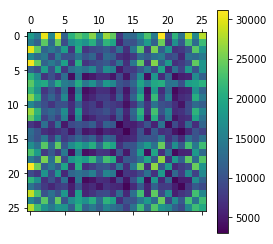

In [13]:
plt.matshow(BlocClusters)
plt.colorbar()
plt.show()
